In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sacc
import os

In [2]:
def make_directory(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)

In [3]:
#cat = 'cosmodc2'
cat = 'gaussian_sims'

if cat == 'cosmodc2':
    dir = '../data_vectors/cosmodc2/2022/feb11/'
if cat == 'gaussian_sims':
    dir = '../data_vectors/gaussian_sims/022422/area12300/March2/'

#file = 'maps_noise/twopoint_data_fourier.sacc'
#d = sacc.Sacc.load_fits(dir+file)
#d_name = 'maps'   

file = 'analytic_noise/twopoint_data_fourier.sacc'
a = sacc.Sacc.load_fits(dir+file)
a_name = 'analytic'

file = 'twopoint_theory_fourier.sacc'
t = sacc.Sacc.load_fits(dir+file)
file = 'summary_statistics_fourier.sacc'
t_cov = sacc.Sacc.load_fits(dir+file)

make_directory(dir + 'plots/')
for dt in a.get_data_types():
        print(dt)
print ('----')


W = "galaxy_density_xi"
GAMMA = "galaxy_shearDensity_xi_t"
GAMMAX = "galaxy_shearDensity_xi_x"
XIP = "galaxy_shear_xi_plus"
XIM = "galaxy_shear_xi_minus"
EE = "galaxy_shear_cl_ee"
DD = "galaxy_density_cl"
ED = "galaxy_shearDensity_cl_e"

galaxy_density_cl
galaxy_shearDensity_cl_b
galaxy_shearDensity_cl_e
galaxy_shear_cl_bb
galaxy_shear_cl_ee
----


In [7]:
a.get_data_types()

['galaxy_density_cl',
 'galaxy_shearDensity_cl_b',
 'galaxy_shearDensity_cl_e',
 'galaxy_shear_cl_bb',
 'galaxy_shear_cl_ee']

In [4]:
#d.get_tag('n_ell', ED,'source_0', 'lens_2')
d.get_tag( 'n_ell' , data_type=EE, tracers=('source_0', 'source_0'))


[3.2927944855361385e-09,
 3.140968574008111e-09,
 3.1095336047594393e-09,
 3.1177851806320184e-09,
 3.1072976242283587e-09,
 3.093399569650353e-09,
 3.1222537971561303e-09,
 3.111412446983043e-09,
 3.110364585551464e-09,
 3.106577236179897e-09,
 3.1145968418064036e-09,
 3.107711996616627e-09,
 3.108346716308495e-09,
 3.111482970132794e-09,
 3.1101043749680224e-09,
 3.1090416189000694e-09,
 3.1086084054300536e-09,
 3.1130435998653207e-09,
 3.1240367397478496e-09]

In [72]:
a.get_data_points(DD, tracers=('lens_0', 'lens_0'))
#d.tracers['source_0'].metadata['n_ell_coupled']

[DataPoint(data_type='galaxy_density_cl', tracers=('lens_0', 'lens_0'), value=5.4498745951464687e-05, window=<sacc.windows.TopHatWindow object at 0x7fd33c8b6950>, j=0, i=0, n_ell=5.760729575601769e-06, ell=109.00000000000003),
 DataPoint(data_type='galaxy_density_cl', tracers=('lens_0', 'lens_0'), value=2.3618513078328826e-05, window=<sacc.windows.TopHatWindow object at 0x7fd33c8b6690>, j=0, i=0, n_ell=4.646179560568804e-06, ell=130.50000000000003),
 DataPoint(data_type='galaxy_density_cl', tracers=('lens_0', 'lens_0'), value=1.67140659893075e-05, window=<sacc.windows.TopHatWindow object at 0x7fd33c8b6b90>, j=0, i=0, n_ell=4.7230690189469775e-06, ell=156.50000000000006),
 DataPoint(data_type='galaxy_density_cl', tracers=('lens_0', 'lens_0'), value=1.573951887731907e-05, window=<sacc.windows.TopHatWindow object at 0x7fd33c8b6e90>, j=0, i=0, n_ell=4.699030782996261e-06, ell=187.0000000000001),
 DataPoint(data_type='galaxy_density_cl', tracers=('lens_0', 'lens_0'), value=1.282340453463444

In [4]:
for i in range(5):
    ell, cl = a.get_ell_cl(DD,'lens_%d'%i, 'lens_%d'%i)
    #ell_theory, cl_theory = t.get_ell_cl(DD,'lens_%d'%i, 'lens_%d'%i)
    #print(cl_theory/cl)
    #print(np.mean(cl_theory/cl))
    #print(np.std(cl_theory/cl))
if  cat == 'gaussian_sims': 
    sims_factor = np.array([20.25, 16.  , 12.25,  9.  ,  9.  ])
else:
    sims_factor = np.array([1., 1.  , 1.,  1.  ,  1.  ])
    
    
#c = ['teal', 'powderblue', 'orange',  'cornflowerblue', 'tomato',  'gray']
c = ["#474747", "#6992C2", "#C0E0FF", "#FADA77", "#FEB580", 'tomato', 'firebrick']
zs = [0.19285902, 0.40831394, 0.65503818, 0.94499109, 1.2947086, 1.72779632, 2.27855242, 3. ] 
if cat == 'gaussian_sims':
    zs = zs[:-2]
nsbins = len(zs)-1
def convert_to_z_labels(z):
    return ['$%0.2f < z < %0.2f$'%(z[i], z[i+1]) for i in range(len(z)-1)]
zs_labels = convert_to_z_labels(zs)
print(zs_labels)

nsbins = 5

# Lens sample
#bias_sheth = [1.4898, 1.5476, 1.7716, 1.9811, 2.1756] # using interpolated cosmodc2 + sheth01 for the bias
#bias_bhat = [1.2736598368851615, 1.3098155824414275, 1.4893638276960628, 1.668048563010521,1.8370479233940058] # using interpolated cosmodc2 + Bhattacharya11 for the bias
#bias_tink = [1.404105583793727,1.4582420469437034,1.6931109537810722,1.921839383230561,2.1327663184325547]
bias = [1.404105583793727,1.4582420469437034,1.6931109537810722,1.921839383230561,2.1327663184325547]
zl = [0.15, 0.3, 0.45, 0.6, 0.75, 0.9]
nlbins = len(zl)-1
zl_labels = convert_to_z_labels(zl)
print(zl_labels)

['$0.19 < z < 0.41$', '$0.41 < z < 0.66$', '$0.66 < z < 0.94$', '$0.94 < z < 1.29$', '$1.29 < z < 1.73$']
['$0.15 < z < 0.30$', '$0.30 < z < 0.45$', '$0.45 < z < 0.60$', '$0.60 < z < 0.75$', '$0.75 < z < 0.90$']


In [7]:
def get_mean(s, dt):
    dps = s.get_data_points(dt)
    mean = []
    thetas = []
    for dp in dps:
        mean.append(dp.value)
        thetas.append(dp['ell'])
    mean = np.array(mean)
    return mean

def get_mean_withgalaxybias(s, dt, galaxy_bias):
    dps = s.get_data_points(dt)
    mean = []
    thetas = []
    masks = []
    for dp in dps:

        if dt == ED:
            source_bin = int(dp.tracers[0][-1])
            lens_bin = int(dp.tracers[1][-1])
            bias_i = galaxy_bias[lens_bin]
            if cat == 'gaussian_sims':
                if lens_bin<source_bin:
                    mean.append(dp.value*bias_i)
                    mask = True
                else:
                    mask = False
            if cat == 'cosmodc2':
                mean.append(dp.value*bias_i)
                mask = True
        if dt == DD:
            #print(dp.tracers)
            lens_bin1 = int(dp.tracers[0][-1])
            lens_bin2 = int(dp.tracers[1][-1])
            if lens_bin1==lens_bin2:
                bias_1 = galaxy_bias[lens_bin1]
                bias_2 = galaxy_bias[lens_bin2]
                mean.append(dp.value*bias_1*bias_2)
                mask = True
            else:
                mask = False
        if dt == EE:
            mean.append(dp.value)
            mask = True
          
        thetas.append(dp['ell'])
        masks.append(mask)
    mean = np.array(mean)
    masks = np.array(masks)
    return mean, masks



def get_theta(s, dt):
    dps = s.get_data_points(dt)
    thetas = []
    for dp in dps:
        thetas.append(dp['ell'])
    thetas = np.array(thetas)
    return thetas

def get_cov(s, dt):
    ind = s.indices(dt)
    cov = s.covariance.get_block(ind)
    return cov
    
def compute_chi2_gauss(data, theory, cov_th, dt, galaxy_bias=None, gaussian_sims_factor = None):
    
    # theory
    if galaxy_bias is not None:
        theory_mean, mask = get_mean_withgalaxybias(theory, dt, galaxy_bias = galaxy_bias)
    else:
        theory_mean, mask = get_mean_withgalaxybias(theory, dt, galaxy_bias = np.ones(nlbins))
     
    # measurements
    if gaussian_sims_factor is not None:
        data_mean, mask = get_mean_withgalaxybias(data, dt, galaxy_bias = gaussian_sims_factor)
    else:
        data_mean, mask = get_mean_withgalaxybias(data, dt, galaxy_bias = np.ones(nlbins))
        
    cov = get_cov(cov_th, dt)
    cov = (cov[mask]).T[mask]
    invcov = np.linalg.inv(cov) 
    deltachi2 = np.dot(np.dot(data_mean-theory_mean, invcov), data_mean-theory_mean)
    ndf = len(data_mean)
    
    return deltachi2, ndf, cov


def compute_chi2_gauss_scale_cuts(data, theory, cov_th, dt, arcmin_cut = None):
    theta, data_mean, mask = get_mean_scale_cuts(data, dt, arcmin_cut)
    theta_th, theory_mean, mask = get_mean_scale_cuts(theory, dt, arcmin_cut)
    #print(theta, theta_th)
    assert(theta.all()==theta_th.all())
    cov = get_cov(cov_th, dt)      
    print('before after scale cut:', len(cov[0]), len(data_mean))
    cov = (cov[mask]).T[mask]
    invcov = np.linalg.inv(cov)
    deltachi2 = np.dot(np.dot(data_mean-theory_mean, invcov), data_mean-theory_mean)
    ndf = len(data_mean)
    
    return deltachi2, ndf, cov


def compute_chi2_jk(data, theory, dt):
    data_mean = get_mean(data, dt)
    theory_mean = get_mean(theory, dt)
    
    cov = get_cov(data, dt)
    invcov = np.linalg.inv(cov)
    deltachi2 = np.dot(np.dot(data_mean-theory_mean, invcov), data_mean-theory_mean)
    ndf = len(data_mean)
    
    return deltachi2, ndf, cov

def compute_chi2_jk_null(data, dt):
    data_mean = get_mean(data, dt)
    
    cov = get_cov(data, dt)
    invcov = np.linalg.inv(cov)
    deltachi2 = np.dot(np.dot(data_mean, invcov), data_mean)
    ndf = len(data_mean)
    
    return deltachi2, ndf, cov


## Compare theory with measurements

In [8]:
#scale_cuts = [24.75, 15.6161, 12.40438403, 12.40438403, 9.85315247]


# get chi2s
deltachi2, ndf, cov = compute_chi2_gauss(a, t, cov_th = t_cov, dt =EE)
print('delta chi2 shear cl (Gaussian cov) = %0.1f'%deltachi2)
print('ndf =', ndf)

deltachi2, ndf, cov = compute_chi2_gauss(a, t, cov_th = t_cov, dt =ED, gaussian_sims_factor = np.sqrt(sims_factor))
print('delta chi2 galaxy-shear cl (Gaussian cov) = %0.1f'%deltachi2)
print('ndf =', ndf)

# only auto
deltachi2, ndf, cov = compute_chi2_gauss(a, t, cov_th = t_cov, dt =DD, gaussian_sims_factor = np.sqrt(sims_factor))
print('delta chi2 galaxy cl (Gaussian cov) = %0.1f'%deltachi2)
print('ndf =', ndf)


#s.get_data_points(galaxy_shearDensity_xi_x)


delta chi2 shear cl (Gaussian cov) = 313.8
ndf = 285
delta chi2 galaxy-shear cl (Gaussian cov) = 561.1
ndf = 190
delta chi2 galaxy cl (Gaussian cov) = 2342.8
ndf = 95


# Make plots of the measurements and theory

In [11]:
def plot_twopoint(s, theory=None, theory_cov = None, datatype=None, ratios = False, diff = False, diff_with_errors=False, cat = 'cosmodc2'):

        
    for dt in s.get_data_types():
        
        if dt == EE:
            nbins1 = nsbins
            nbins2 = nsbins
            name1 = 'source'
            name2 = 'source'
        
        if dt == ED:
            nbins1 = nsbins
            nbins2 = nlbins
            name1 = 'source'
            name2 = 'lens'

        if dt == DD:
            nbins1 = nlbins
            nbins2 = nlbins
            name1 = 'lens'
            name2 = 'lens'
            
        if dt == datatype:
            print(dt)
            plt.clf()
            if dt == ED:
                if cat == 'cosmodc2':
                    fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 3.2*nbins2), sharey=True, sharex=True)
                if cat == 'gaussian_sims':
                    fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 2.2*nbins2), sharey=True, sharex=True)
            else:
                fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 2.2*nbins2), sharey=True, sharex=True)
            plt.subplots_adjust(wspace=0.1, hspace=0.1)

            for i in range(nbins1):
                for j in range(nbins2):

                    ell, cl = s.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j))
                    
                    if theory_cov is not None:
                        # this returns the theory cov, and overwrites the error if theory_cov is not None
                        _, _, cov = theory_cov.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                        err = np.sqrt(np.diag(cov))
                    
                    if theory is not None:
                        ell_th, cl_th = theory.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = False)
                        #print(ell, cl_th)
                    if ratios:
                        ax[i][j].errorbar(ell, cl/cl_th, err/cl_th, fmt = '.',  capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurement/Theory')
                    elif diff:
                        ax[i][j].errorbar(ell, cl-cl_th, fmt = '.',  capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurement-Theory')
                        ax[i][j].fill_between(theta, -err, err, alpha = 0.5, color = 'powderblue')
       
                    if datatype == EE:
                        ax[i][j].plot(ell_th, cl_th, ls = '-', lw = '1.5', color = c[1], label = 'Theory')
                        ax[i][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurements')
                    
                    
                    if datatype == ED:
         
                        if cat == 'gaussian_sims':
                            ax[i][j].plot(ell, cl_th, ls = '-', lw = '1.5', color = c[1], label = 'Theory $(b=1)$')
                            ax[i][j].errorbar(ell, cl*np.sqrt(sims_factor[j]), err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurements')
                        else:
                            ax[i][j].plot(ell, cl_th*bias[j], ls = '-', lw = '1.5', color = c[1], label = 'Theory ($b$ from Tinker)') 
                            ax[i][j].plot(ell, cl_th, ls = '-', lw = '1.5', color = 'lightgray', label = 'Theory ($b=1$)')
                            ax[i][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurements')
                            
                    if datatype == DD:
                        if cat == 'gaussian_sims':
                            ax[i][j].plot(ell, cl_th, ls = '-', lw = '1.5', color = c[1], label = 'Theory $(b=1)$')
                            print('!!Mutliplying by the gaussian sims factor!!', np.sqrt(sims_factor[j])*np.sqrt(sims_factor[i]))
                            ax[i][j].errorbar(ell, cl*np.sqrt(sims_factor[j])*np.sqrt(sims_factor[i]), ell*err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurements')
                        else:
                            ax[i][j].plot(ell, cl_th*bias[j]**2, ls = '-', lw = '1.5', color = c[1], label = 'Theory ($b$ from Tinker)')
                            ax[i][j].plot(ell, cl_th, ls = '-', lw = '1.5', color = 'lightgray', label = 'Theory ($b=1$)')
                            ax[i][j].errorbar(ell, cl, err, fmt = '.', capsize=1.5, elinewidth=0.8, color = c[1], label = 'Measurements')
                    if (datatype==EE) or ((datatype==DD or datatype==ED) and j>0 or i>0):
                        ax[i][j].text(0.5, 0.88, "(%d, %d)"%(i+1, j+1), horizontalalignment='center',
                                  verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
                        
                    ax[i][j].set_xscale('log')
                    #ax[i][j].set_xlim(100, 3000)
                    

                    if ratios:
                        ax[i][j].set_ylim(0.6, 1.4)
                        ax[i][j].axhline(y =1, ls = ':', color = 'k')
                    elif diff:
                        ax[i][j].set_ylim(-0.00001, 0.000005)
                        ax[i][j].axhline(y =0, ls = ':', color = 'k')
                    elif diff_with_errors:
                        ax[i][j].set_ylim(-3, 3.)
                        ax[i][j].axhline(y =0, ls = ':', color = 'k')
                    else:
                        ax[i][j].set_yscale('log')
                        if datatype==EE:
                            ax[i][j].set_ylim(8*10**(-12), 10**(-7))
                        #if datatype==ED:
                        #    ax[i][j].set_ylim(2*10**(-9), 3.5*10**(-4))  
                        #if datatype==GAMMA:

                    if i==nbins1-1: 
                        ax[i][j].set_xlabel(r'$\ell$')
                
                    if j==0:
                        if datatype==EE:
                            ax[i][j].set_ylabel(r'$C_{\gamma \gamma}(\ell)$')
                        if datatype==ED:
                            ax[i][j].set_ylabel(r'$C_{\delta \gamma}(\ell)$')
                        if datatype==DD:
                            ax[i][j].set_ylabel(r'$C_{\delta \delta}(\ell)$')

                            
                    if datatype!=ED:
                        if i<j:
                            fig.delaxes(ax[i, j])
    if datatype==ED or datatype==DD:
        ax[0][0].legend(frameon = False, loc = 'best')

    return fig


In [10]:
def arcmin2_to_rad2(density):
    return density*60**2*41253/(4*np.pi)

def plot_noise(s, datatype=None, compare=None, density_arcmin=None):
    plt.rc("text", usetex=True)
    plt.rc("font", family="serif")
        
    for dt in s.get_data_types():
        
        if dt == EE:
            nbins1 = nsbins
            nbins2 = nsbins
            name1 = 'source'
            name2 = 'source'
        
        if dt == ED:
            nbins1 = nsbins
            nbins2 = nlbins
            name1 = 'source'
            name2 = 'lens'

        if dt == DD:
            nbins1 = nlbins
            nbins2 = nlbins
            name1 = 'lens'
            name2 = 'lens'
            
        if dt == datatype:
            print(dt)
            plt.clf()
            # noise is 0 for cross-correlations, only matters for auto redshift bins
            fig, ax = plt.subplots(1, nbins1, figsize=(1.8*nsbins, 1.8*0.95), sharey=True, sharex=True)

            plt.subplots_adjust(wspace=0.1, hspace=0.1)
    
            for i in range(nbins1):
                    ell, cl = s.get_ell_cl(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, i))
                    n_ell = s.get_tag( 'n_ell', data_type=dt, tracers=('%s_%s'%(name1,i),'%s_%s'%(name2, i)) )
                    n_ell_coupled = s.tracers['%s_%s'%(name1,i)].metadata['n_ell_coupled']
                    if compare is not None:
                        n_ell_analytic = compare.get_tag( 'n_ell', data_type=dt, tracers=('%s_%s'%(name1,i),'%s_%s'%(name2, i)) )
                        n_ell_coupled_analytic = compare.tracers['%s_%s'%(name1,i)].metadata['n_ell_coupled']
                    if n_ell is not None:
                        ax[i].plot(ell, np.array(n_ell), ls = '-', lw = '1.5', color = c[1], label = 'From maps')
                        ax[i].plot(ell, n_ell_analytic, ls = '--', lw = '1.5', color = c[1], label = 'Analytic')
                        ax[i].plot(ell, [n_ell_coupled]*len(ell), ls = '-', lw = '1.5', color = c[4], label = 'From maps coupled')
                        ax[i].plot(ell, [n_ell_coupled_analytic]*len(ell), ls = '--', lw = '1.5', color = c[4], label = 'Analytic coupled')

                    if density_arcmin is not None:
                        density_rad = arcmin2_to_rad2(density_arcmin[i])
                        noise_direct = 1/density_rad
                        ax[i].plot(ell, [noise_direct]*len(ell), ls = ':', lw = '1.5', color = c[0], label = '1/ndens')
                    
                    ax[i].set_xscale('log')
                    ax[i].set_yscale('log')
                
                    ax[i].set_xlabel(r'$\ell$')
                
    
                    if dt == DD:
                        ax[0].set_ylabel(r'Clustering Noise')
                    if dt == EE:
                        ax[0].set_ylabel(r'Cosmic shear Noise')


    ax[0].legend(frameon = False,bbox_to_anchor = (6.9, 0.94))

    return fig


galaxy_density_cl


<Figure size 432x288 with 0 Axes>

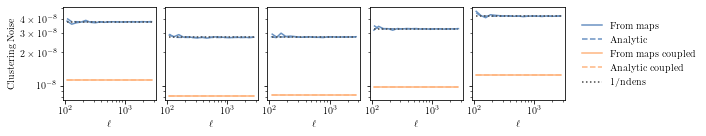

In [13]:
if cat == 'cosmodc2':
    lens_density = np.array([0.018115458448473835, 0.0348763018449613, 0.05980260363102459, 0.0890867121108154, 0.1072563048039318])
if cat == 'gaussian_sims':
    lens_density = np.array([2.2512824191217113, 3.1115067729648382, 3.08574032321282, 2.6049633670894528, 2.002980579933056])
fig = plot_noise(d, datatype=DD, compare=a, density_arcmin = lens_density)
make_directory(dir + 'plots/noise/')
plt.savefig(dir + 'plots/noise/' + 'cl_galaxy_noise.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)

galaxy_shear_cl_ee


<Figure size 432x288 with 0 Axes>

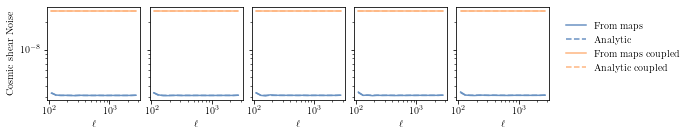

In [14]:
fig = plot_noise(d, datatype=EE, compare=a)
make_directory(dir + 'plots/noise/')
plt.savefig(dir + 'plots/noise/' + 'cl_shear_noise.png', dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)


galaxy_shear_cl_ee


/Users/juditprat/anaconda3/anaconda3/lib/python3.7/site-packages/sacc/sacc.py:370: UserWarning: Empty index selected - maybe you should check the tracer order?
  warnings.warn("Empty index selected - maybe you "


<Figure size 432x288 with 0 Axes>

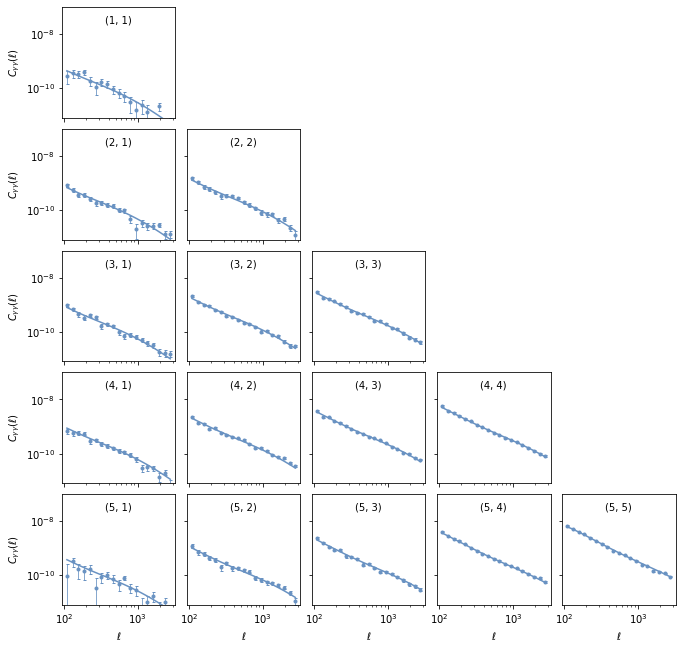

In [12]:
fig = plot_twopoint(a, theory=t, theory_cov = t_cov, datatype=EE, cat= cat, ratios = False, diff = False, diff_with_errors = False)
plt.savefig(dir + 'plots/' + 'cl_shear_%s'%a_name, dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)

galaxy_shearDensity_cl_e


<Figure size 432x288 with 0 Axes>

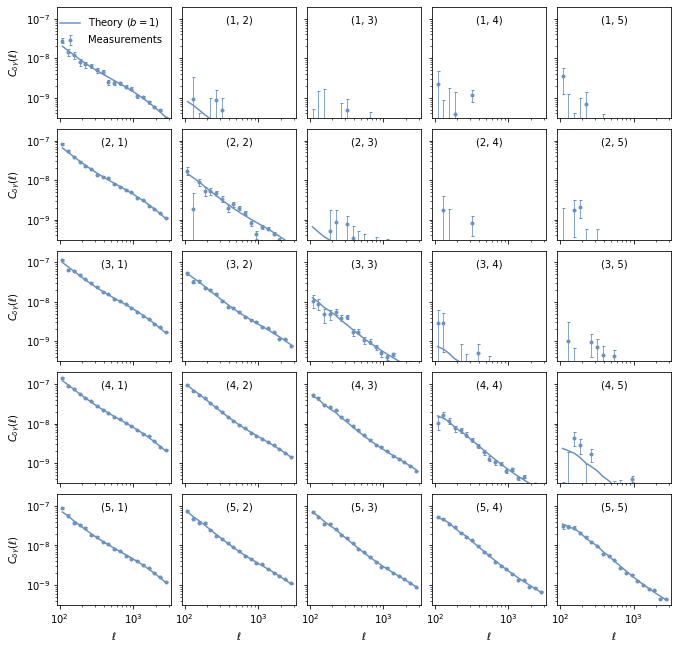

In [13]:
fig = plot_twopoint(a, theory=t, theory_cov = t_cov, datatype=ED, cat=cat, ratios = False, diff = False, diff_with_errors = False)
plt.savefig(dir + 'plots/' + 'cl_galaxyshear_%s'%a_name, dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)

galaxy_density_cl
!!Mutliplying by the gaussian sims factor!! 20.25
!!Mutliplying by the gaussian sims factor!! 18.0
!!Mutliplying by the gaussian sims factor!! 15.75
!!Mutliplying by the gaussian sims factor!! 13.5
!!Mutliplying by the gaussian sims factor!! 13.5
!!Mutliplying by the gaussian sims factor!! 18.0
!!Mutliplying by the gaussian sims factor!! 16.0
!!Mutliplying by the gaussian sims factor!! 14.0
!!Mutliplying by the gaussian sims factor!! 12.0
!!Mutliplying by the gaussian sims factor!! 12.0
!!Mutliplying by the gaussian sims factor!! 15.75
!!Mutliplying by the gaussian sims factor!! 14.0
!!Mutliplying by the gaussian sims factor!! 12.25
!!Mutliplying by the gaussian sims factor!! 10.5
!!Mutliplying by the gaussian sims factor!! 10.5
!!Mutliplying by the gaussian sims factor!! 13.5
!!Mutliplying by the gaussian sims factor!! 12.0
!!Mutliplying by the gaussian sims factor!! 10.5
!!Mutliplying by the gaussian sims factor!! 9.0
!!Mutliplying by the gaussian sims factor!! 9.0


<Figure size 432x288 with 0 Axes>

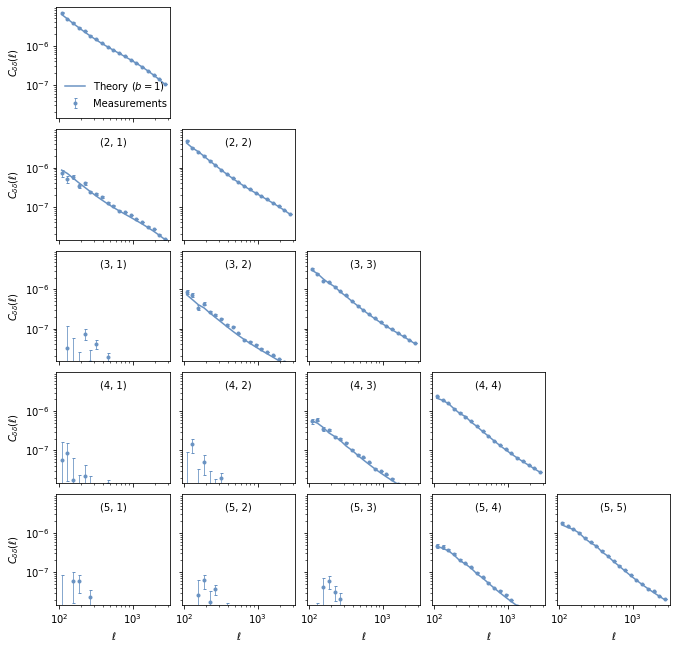

In [14]:
fig = plot_twopoint(a, theory=t, theory_cov = t_cov, datatype=DD, cat=cat, ratios = False, diff = False, diff_with_errors = False)
plt.savefig(dir + 'plots/' + 'cl_galaxy_%s'%a_name, dpi = 500, bbox_inches = 'tight',  pad_inches = 0.1)

In [49]:
def plot_errorbars(s, theory=None, theory_cov = None, datatype=None, ratios = False, plot_namaster=True):
      
    for dt in s.get_data_types():
        
        if dt == XIP or dt == XIM:
            nbins1 = nsbins
            nbins2 = nsbins
            name1 = 'source'
            name2 = 'source'
        
        if dt == GAMMA:
            nbins1 = nsbins
            nbins2 = nlbins
            name1 = 'source'
            name2 = 'lens'

        if dt == W:
            nbins1 = nlbins
            nbins2 = nlbins
            name1 = 'lens'
            name2 = 'lens'
            
        if dt == datatype:
            print(dt)
            plt.clf()
            if dt == GAMMA:
                fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 3.2*nbins2), sharey=True, sharex=True)
            else:
                fig, ax = plt.subplots(nbins1, nbins2, figsize=(2.2*nbins1, 2.2*nbins2), sharey=True, sharex=True)
            plt.subplots_adjust(wspace=0.1, hspace=0.1)

            
            if plot_namaster:
                if dt == XIP:
                    err_na = np.loadtxt(dir + 'covariance_namaster/cov_xip.txt')
                if dt == XIM:
                    err_na = np.loadtxt(dir + 'covariance_namaster/cov_xim.txt')
            count =-1
            for i in range(nbins1):
                for j in range(nbins2):
                    
                    

                    theta, xi, cov = s.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)

                    #print('i, j, xi:', i, j, xi)
                    mask_ls = theta<100
                    theta = theta[mask_ls]
                    xi = xi[mask_ls]
                    cov = (cov[mask_ls]).T[mask_ls]
                    err = np.sqrt(np.diag(cov))
                    
                    if theory is not None:
                        theta_th,  xi_th = theory.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j))
                        if theory_cov is not None:
                            _, _, cov_th = theory_cov.get_theta_xi(dt,'%s_%s'%(name1,i) , '%s_%s'%(name2, j), return_cov = True)
                        theta_th = theta_th[mask_ls]
                        xi_th = xi_th[mask_ls]
                        cov_th = (cov_th[mask_ls]).T[mask_ls]
                        err_th = np.sqrt(np.diag(cov_th))
                        
                    if plot_namaster:
                        if len(theta)>0:
                            count += 1
                            err_na_block = err_na[count*15:(count+1)*15]

                    if ratios:
                        ax[i][j].plot(theta, err/err_th, lw = 2, color = c[0], label = 'Jackknife/Theory std')
                        if plot_namaster:
                            if len(theta)>0:
                                ax[i][j].plot(theta, err_na_block/err_th, lw = 2, color = 'powderblue', label = 'Namaster/Theory std')
                                ax[i][j].plot(theta, err/err_na_block, lw = 2, color = c[2], label = 'JK/Namaster')
                    else:
                        ax[i][j].plot(theta, err, lw = 2, color = c[0], label = 'Jackknife')
                        ax[i][j].plot(theta, err_th, lw = 2,color = c[2],  label = 'Theory')
                        if plot_namaster:
                            if len(theta)>0:
                                ax[i][j].plot(theta, err_na_block, lw = 2, color = 'powderblue',  label = 'Namaster Jackie')

                    ax[i][j].text(0.5, 0.88, "(%d, %d)"%(i+1, j+1), horizontalalignment='center',
                                  verticalalignment='center', transform=ax[i][j].transAxes)#, fontsize=12)
                    ax[i][j].set_xscale('log')
                    ax[i][j].set_xlim(2, 110)
                    
                    if ratios:
                        ax[i][j].set_ylim(0.6, 1.4)
                        ax[i][j].axhline(y =1, ls = ':', color = 'k')
                    else:
                        ax[i][j].set_yscale('log')
                        if datatype==XIP:
                            ax[i][j].set_ylim(10**(-7), 5*10**(-4))
                        if datatype==XIM:
                            ax[i][j].set_ylim(10**(-7), 3.5*10**(-4))  
                        if datatype==GAMMA:
                            ax[i][j].set_ylim(7*10**(-6), 4.*10**(-3))  
                        if datatype==W:
                            ax[i][j].set_ylim(10**(-3), 1.2)  


                    if i==nsbins-1: 
                        ax[i][j].set_xlabel(r'$\theta$ [arcmin]')
                    if j==0:
                        if datatype==XIP:
                            ax[i][j].set_ylabel(r'$\xi_+$')
                        if datatype==XIM:
                            ax[i][j].set_ylabel(r'$\xi_-$')
                        if datatype==GAMMA:
                            ax[i][j].set_ylabel(r'$\gamma_t$')
                        if datatype==W:
                            ax[i][j].set_ylabel(r'$w(\theta)$')
                            
                    if datatype!=GAMMA:
                        if i<j:
                            fig.delaxes(ax[i, j])

    ax[0][0].legend(frameon = False, loc = 'lower left')

    return fig


In [50]:
def corrmatrix(cov):
    cov = np.mat(cov)
    D = np.diag(np.sqrt(np.diag(cov)))
    d = np.linalg.inv(D)
    corr = d*cov*d
    return corr

def plot_cov(cov, size):
    
    ncov1 = len(cov)
    ncov2 = len(cov[0])
    
    corr = corrmatrix(cov)
    cov_vmin = np.min(corr)
    
    figsize1 = 1.22222222227*ncov1/size
    figsize2 = ncov2/size
    fig, ax = plt.subplots(1, 1, figsize=(figsize1, figsize2))
    im = ax.imshow(corr, interpolation='nearest',
                           aspect='auto', origin='lower', vmin=-0.5, vmax=1.)
    cbar = fig.colorbar(im)
    return fig